<a href="https://colab.research.google.com/github/Frodmar/Proyecto_3_Francisco_Manuel/blob/main/Practica_SQL_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
# Instalación silenciosa de missingno
# (no muestra output)
%%capture
!pip install missingno

#Importamos las librerias necesarias para realizar nuestro procesamiento y limpieza de datos

In [5]:
#Importamos las librerias esenciales
import pandas as pd #Para manejo de datos
import numpy as np #Para operaciones numericas
import plotly as pl #Para visualizaciones interactivas
import seaborn as sns #Para gráficos estadisticos
import missingno as msno #Visualizacion de datos faltantes

Cargamos el dataset de kiva_loans.csv para trabajar

In [6]:
# Cargamos nuestro dataset principal
df = pd.read_csv('client_activity.csv')

In [7]:
# Aseguremos que sea DataFrame
df = pd.DataFrame(df)

In [8]:
# Echamos un vistazo a las primeras 20 filas
df.head(20)

,customer_id,first_name,last_name,email,active,address,district,postal_code,city,country,rental_date,return_date,amount,payment_date,rental_duration
0,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-15 20:25:53,2005-06-22 23:34:53,2.99,2005-06-15 20:25:53,7
1,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 05:49:46,2005-06-20 00:25:46,0.99,2005-06-18 05:49:46,2
2,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-06-18 06:10:23,2005-06-20 00:39:23,0.99,2005-06-18 06:10:23,2
3,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-08 20:31:43,2005-07-15 15:58:43,6.99,2005-07-08 20:31:43,7
4,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-09 12:10:44,2005-07-11 17:32:44,0.99,2005-07-09 12:10:44,2
5,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-10 11:50:04,2005-07-13 10:37:04,0.99,2005-07-10 11:50:04,3
6,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-27 04:43:53,2005-07-29 07:33:53,4.99,2005-07-27 04:43:53,2
7,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-27 10:09:39,2005-08-03 16:05:39,8.99,2005-07-27 10:09:39,7
8,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-30 05:28:40,2005-08-07 01:34:40,6.99,2005-07-30 05:28:40,8
9,218,vera,mccoy,vera.mccoy@sakilacustomer.org,1,1168 najafabad parkway,kabol,40301,kabul,afghanistan,2005-07-31 14:24:33,2005-08-09 11:11:33,6.99,2005-07-31 14:24:33,9


#Estadistica descriptiva

In [9]:
#Vemos la forma del dataset (filas,columnas)
df.shape

(1000, 15)

In [10]:
# Informacion general del dataset
#Tipos de datos , nulos , uso de memoria
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   customer_id      1000 non-null   int64  
 1   first_name       1000 non-null   object 
 2   last_name        1000 non-null   object 
 3   email            1000 non-null   object 
 4   active           1000 non-null   int64  
 5   address          1000 non-null   object 
 6   district         965 non-null    object 
 7   postal_code      1000 non-null   int64  
 8   city             1000 non-null   object 
 9   country          1000 non-null   object 
 10  rental_date      1000 non-null   object 
 11  return_date      1000 non-null   object 
 12  amount           1000 non-null   float64
 13  payment_date     1000 non-null   object 
 14  rental_duration  1000 non-null   int64  
dtypes: float64(1), int64(4), object(10)
memory usage: 117.3+ KB


In [11]:
#Contamos valores  no nulos por columna
df.count()

,0
customer_id,1000
first_name,1000
last_name,1000
email,1000
active,1000
address,1000
district,965
postal_code,1000
city,1000
country,1000


In [12]:
# Estadistica descriptivas de las columnas numericas
df.describe()

,customer_id,active,postal_code,amount,rental_duration
count,1000.00000,1000.0,1000.0000,1000.000000,1000.000000
mean,309.01400,1.0,47087.3620,4.114000,5.082000
std,163.83995,0.0,28324.5854,2.338823,2.565903
min,21.00000,1.0,1195.0000,0.990000,0.000000
25%,173.00000,1.0,28396.0000,2.990000,3.000000
50%,329.00000,1.0,39414.0000,3.990000,5.000000
75%,431.00000,1.0,75543.0000,4.990000,7.000000
max,590.00000,1.0,99865.0000,10.990000,10.000000


In [13]:
# Buscamos duplicados
df.duplicated().sum()

np.int64(0)

#¿Hay valores nulos?

In [14]:
# Contamos nulos por columna, ordenados de mayor a menor
df.isna().sum().sort_values(ascending=False)

,0
district,35
first_name,0
customer_id,0
last_name,0
email,0
active,0
address,0
postal_code,0
city,0
country,0


#¿Son mas del 25%?

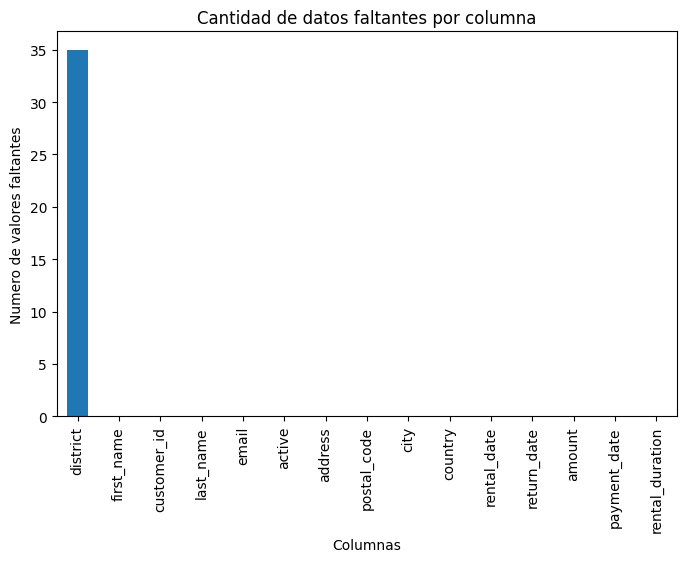

In [15]:
# Verificamos si los nulos superan el 25%

import matplotlib.pyplot as plt

# calcular % de nulos
missing = df.isna().sum().sort_values(ascending=False)

plt.figure(figsize=(8, 5))
missing.plot(kind='bar')
plt.title('Cantidad de datos faltantes por columna')
plt.ylabel("Numero de valores faltantes")
plt.xlabel('Columnas')
plt.show()

In [16]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)
print(missing_pct)

district           3.5
first_name         0.0
customer_id        0.0
last_name          0.0
email              0.0
active             0.0
address            0.0
postal_code        0.0
city               0.0
country            0.0
rental_date        0.0
return_date        0.0
amount             0.0
payment_date       0.0
rental_duration    0.0
dtype: float64


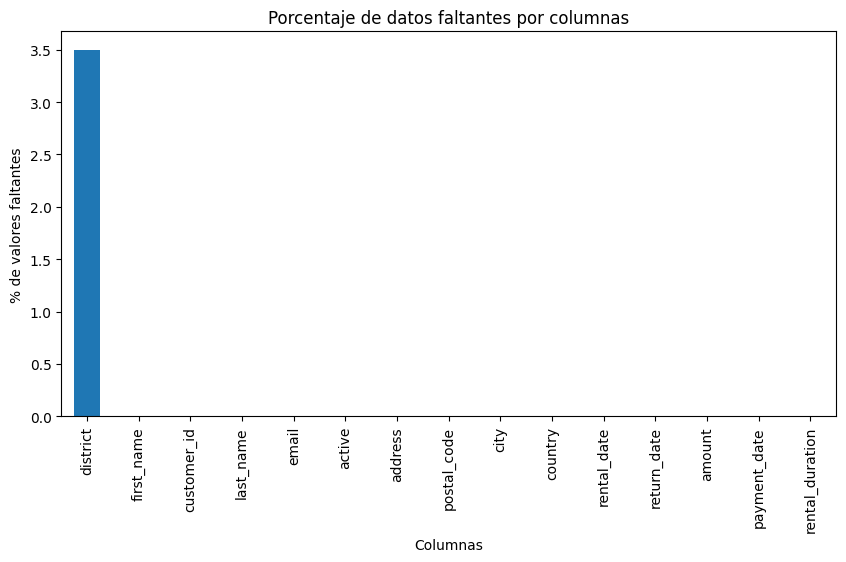

In [17]:
missing_pct = (df.isna().mean() * 100).sort_values(ascending=False)

plt.figure(figsize=(10, 5))
missing_pct.plot(kind='bar')
plt.title('Porcentaje de datos faltantes por columnas')
plt.ylabel("% de valores faltantes")
plt.xlabel('Columnas')
plt.show()

###Creamos una copia del dataset original para aplicarle cambios importantes como borrar columnas, cambiar tipos de datos, etc

In [18]:
client_activity_df = df.copy()

#Tomamos las columnas de fecha y les definimos el tipo de dato "datamine"

In [19]:
# Convertir a datetime las fechas
client_activity_df["rental_date"] = pd.to_datetime(client_activity_df["rental_date"],errors ="coerce")
client_activity_df["return_date"] = pd.to_datetime(client_activity_df["return_date"],errors ="coerce")
client_activity_df["payment_date"] = pd.to_datetime(client_activity_df["payment_date"],errors ="coerce")

# Normalizar a la fecha (eliminar la hora, estableciendola en medianoche) manteniendo el tipo
client_activity_df["rental_date"] = client_activity_df["rental_date"].dt.normalize()
client_activity_df["return_date"] = client_activity_df["return_date"].dt.normalize()
client_activity_df["payment_date"] = client_activity_df["payment_date"].dt.normalize()

In [20]:
client_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   object        
 2   last_name        1000 non-null   object        
 3   email            1000 non-null   object        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   object        
 6   district         965 non-null    object        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   object        
 9   country          1000 non-null   object        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

#Tomamos las columnas de tipo de dato "object" y les definios el tipo de dato "string"

In [21]:
for col in client_activity_df.columns:
  if client_activity_df[col].dtype == 'object':
    client_activity_df[col] = client_activity_df[col].astype('string')

#Verificamos nuevamente el tipo de datos de las columnas

In [22]:
client_activity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 15 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   customer_id      1000 non-null   int64         
 1   first_name       1000 non-null   string        
 2   last_name        1000 non-null   string        
 3   email            1000 non-null   string        
 4   active           1000 non-null   int64         
 5   address          1000 non-null   string        
 6   district         965 non-null    string        
 7   postal_code      1000 non-null   int64         
 8   city             1000 non-null   string        
 9   country          1000 non-null   string        
 10  rental_date      1000 non-null   datetime64[ns]
 11  return_date      1000 non-null   datetime64[ns]
 12  amount           1000 non-null   float64       
 13  payment_date     1000 non-null   datetime64[ns]
 14  rental_duration  1000 non-null   int64   

##Nos aseguramos que los datos de tipo" str" no tengan espacios innecesarios y que esten escritas en minuscula

In [23]:
def clean_text(s):
  return s.astype(str).str.strip().str.lower()

for col in client_activity_df.columns:
  if client_activity_df[col].dtype == 'string':
    client_activity_df[col] = clean_text(client_activity_df[col])

#Visualicemos la informacion que hemos limpiado

#Distribucion de prestamos

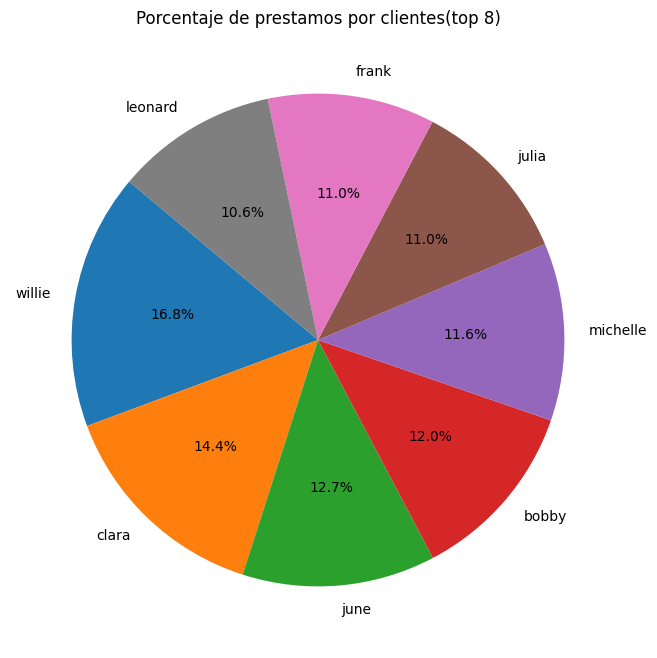

In [24]:
top_clients = client_activity_df['first_name'].value_counts().nlargest(8)
plt.figure(figsize = (8,8))
plt.pie(top_clients, labels = top_clients.index, autopct = '%1.1f%%', startangle = 140)
plt.title('Porcentaje de prestamos por clientes(top 8)')
plt.show()

#Verificamos la existencia de outliers (valores atipicos)

In [27]:
client_activity_df['customer_id'].value_counts()

,count
customer_id,
144,42
176,37
381,35
21,34
89,32
329,32
405,31
307,30
173,29


In [28]:
  q1 = client_activity_df["amount"].quantile(0.25)
  q3 = client_activity_df["amount"].quantile(0.75)
  iqr = q3 - q1

  #Limites para detectar outliers
  lower_bound = q1 - 1.5 * iqr
  upper_bound = q3 + 1.5 * iqr

  # Filtrar outliers
  outliers = client_activity_df[(client_activity_df["amount"] < lower_bound) | (client_activity_df["amount"] > upper_bound)]
  n_outliers = len(outliers)

  print(f"\nClientes")
  print(f" Q1: {q1}")
  print(f" Q3: {q3}")
  print(f" IQR: {iqr}")
  print(f" Outliers: {n_outliers}")


Clientes
 Q1: 2.99
 Q3: 4.99
 IQR: 2.0
 Outliers: 48


In [29]:
client_activity_df.to_csv("client_activity_clean.csv")